<a href="https://colab.research.google.com/github/EmAchieng/DataSciencePracticeSeries/blob/master/JSON_Requests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Q0'></a>
<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1McNxpNrSwfqu1w-QtlOmPSmfULvkkMQV" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>
<center> <h1> Live coding 2: JSON</h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>Propulsion Academy, 2021</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> learn how to create, read and write JSON files</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>The JSON String</a></li>
            <li> <a style="color:#303030" href='#P2'>Serialization/Deserialization</a></li>
            <li> <a style="color:#303030" href='#P3'>Write and Read JSON Files</a></li>
            <li> <a style="color:#303030" href='#P4'>Read JSON From URL</a></li>
            <li> <a style="color:#303030" href='#P5'>Explore deserialized JSON strings (dictionaries!)</a></li>
        </ol>
        <strong>Topics Trained:</strong> Requests, REST APIs, JSON
    </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/intro-2-ds-materials/index.html" title="momentum"> Introduction to Data Science </a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/intro-2-ds-materials/weeks/week1/day2/index.html" title="momentum">Day 2, Data Wrangling </a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/intro-2-ds-materials/weeks/week1/day2/pages/materials.html" title="momentum"> Live Coding 2, JSON</a>
</strong></nav>

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Packages

In [ ]:
import json
import requests
from pandas import json_normalize

<a id='P1' name='P1'></a>
## [The JSON String](#P0)

- JSON - Javascript Object Notation
- Standard for exchanging data between client (browser) and server
- Replaced XML as standard for the web (more compact and easier to read)
- Set of key/value pairs
- Easy to serialise objects

Example of a JSON string:

In [ ]:
json_string = """
{
 "batch_tag": "Feb 2021", 
 "start_date": {"month": "02"}, 
 "curriculum": {"Week1": "Stats", "Week2": "DS Toolkit"},  
 "students": [{"name": "Ksenia", "surname": "Kurtova"}, 
             {"name": "Lina", "surname": "Siegrist"},
             {"name": "Gianluca", "surname": "Macauda"},
             {"name": "Ferdinand", "surname": "Limmer"},
             {"name": "Julien", "surname": "Dupont"},
             {"name": "Lena", "surname": "Rubi"},
             {"name": "Lisa", "surname": "Crowther"},
             {"name": "Marcus", "surname": "Lindberg"},
             {"name": "Raoul", "surname": "Steiger"},
             {"name": "Gilda", "surname": "Fernandez Concha"},
             {"name": "Maritsa", "surname": "Norton"},
             {"name": "Diana", "surname": "Alvarez Marin"},
             {"name": "Thomas", "surname": "Massie"},
             {"name": "Joseph", "surname": "Stanton"},
             {"name": "Natalie", "surname": "Arias"}
             ]
}
"""

In [ ]:
json_string

'\n{\n "batch_tag": "Feb 2021", \n "start_date": {"month": "02"}, \n "curriculum": {"Week1": "Stats", "Week2": "DS Toolkit"},  \n "students": [{"name": "Ksenia", "surname": "Kurtova"}, \n             {"name": "Lina", "surname": "Siegrist"},\n             {"name": "Gianluca", "surname": "Macauda"},\n             {"name": "Ferdinand", "surname": "Limmer"},\n             {"name": "Julien", "surname": "Dupont"},\n             {"name": "Lena", "surname": "Rubi"},\n             {"name": "Lisa", "surname": "Crowther"},\n             {"name": "Marcus", "surname": "Lindberg"},\n             {"name": "Raoul", "surname": "Steiger"},\n             {"name": "Gilda", "surname": "Fernandez Concha"},\n             {"name": "Maritsa", "surname": "Norton"},\n             {"name": "Diana", "surname": "Alvarez Marin"},\n             {"name": "Thomas", "surname": "Massie"},\n             {"name": "Joseph", "surname": "Stanton"},\n             {"name": "Natalie", "surname": "Arias"}\n             ]\n}\n'

### JSON vs XML

- XML - Extensible Markup Language
- JSON - JavaScript Object Notation 


In [ ]:
XML = """
<users>
    <user>
        <username>SammyShark</username> <location>Indian Ocean</location>
    </user>
    <user>
        <username>JesseOctopus</username> <location>Pacific Ocean</location>
    </user>
    <user>
        <username>DrewSquir</username> <location>Atlantic Ocean</location>
    </user>
    <user>
        <username>JamieMantisShrimp</username> <location>Pacific Ocean</location>
    </user>
</users>"""

# 417 chars

JSON = """
{"users": [
      {"username" : "SammyShark", "location" : "Indian Ocean"},
      {"username" : "JesseOctopus", "location" : "Pacific Ocean"},
      {"username" : "DrewSquid", "location" : "Atlantic Ocean"},
      {"username" : "JamieMantisShrimp", "location" : "Pacific Ocean"}
] }
"""

# 284 chars

<a id='P2' name='P2'></a>
## [Serialization/Deserialization](#P0)

- Serialization - convert the data into the format suitable for sending over the network
- Deserialization - from  network format to local data

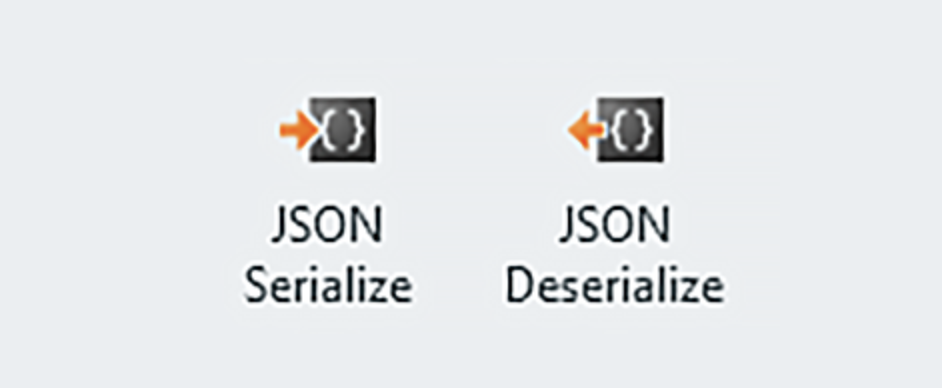

### Receive the reply from server - deserialize:

In [ ]:
# FIRST load from strings, deserialize, get python dict
dict_from_string = json.loads(json_string)
dict_from_string

{'batch_tag': 'Feb 2021',
 'curriculum': {'Week1': 'Stats', 'Week2': 'DS Toolkit'},
 'start_date': {'month': '02'},
 'students': [{'name': 'Ksenia', 'surname': 'Kurtova'},
  {'name': 'Lina', 'surname': 'Siegrist'},
  {'name': 'Gianluca', 'surname': 'Macauda'},
  {'name': 'Ferdinand', 'surname': 'Limmer'},
  {'name': 'Julien', 'surname': 'Dupont'},
  {'name': 'Lena', 'surname': 'Rubi'},
  {'name': 'Lisa', 'surname': 'Crowther'},
  {'name': 'Marcus', 'surname': 'Lindberg'},
  {'name': 'Raoul', 'surname': 'Steiger'},
  {'name': 'Gilda', 'surname': 'Fernandez Concha'},
  {'name': 'Maritsa', 'surname': 'Norton'},
  {'name': 'Diana', 'surname': 'Alvarez Marin'},
  {'name': 'Thomas', 'surname': 'Massie'},
  {'name': 'Joseph', 'surname': 'Stanton'},
  {'name': 'Natalie', 'surname': 'Arias'}]}

In [ ]:
type(dict_from_string)

dict

In python JSON files are deserialized as dictionaries:
- 'value' can be almost anything  
- 'key' should be immutable!   

A tuple can also be a dictionary key.
However, neither a list nor another dictionary can serve as a dictionary key, because lists and dictionaries are mutable. 

### Pass arguments to remote – serialize  

Dump json into string, serialize ``obj`` to a JSON formatted ``str`` (if you want to store or transmit data).  
Returns the JSON string representation of the python dict. 

In [ ]:
new_json_string = json.dumps(dict_from_string)
new_json_string

'{"batch_tag": "Feb 2021", "start_date": {"month": "02"}, "curriculum": {"Week1": "Stats", "Week2": "DS Toolkit"}, "students": [{"name": "Ksenia", "surname": "Kurtova"}, {"name": "Lina", "surname": "Siegrist"}, {"name": "Gianluca", "surname": "Macauda"}, {"name": "Ferdinand", "surname": "Limmer"}, {"name": "Julien", "surname": "Dupont"}, {"name": "Lena", "surname": "Rubi"}, {"name": "Lisa", "surname": "Crowther"}, {"name": "Marcus", "surname": "Lindberg"}, {"name": "Raoul", "surname": "Steiger"}, {"name": "Gilda", "surname": "Fernandez Concha"}, {"name": "Maritsa", "surname": "Norton"}, {"name": "Diana", "surname": "Alvarez Marin"}, {"name": "Thomas", "surname": "Massie"}, {"name": "Joseph", "surname": "Stanton"}, {"name": "Natalie", "surname": "Arias"}]}'

In [ ]:
type(new_json_string)

str

<a id='P3' name='P3'></a>
## [Write and Read JSON Files](#P0)

In [ ]:
# save as json file (dump), it is a string, not dictionary
with open("ds_program.json", "w") as output:
    json.dump(dict_from_string, output)

In [ ]:
# open as json file (load)
with open("ds_program.json") as json_file:
    data_json1 = json.load(json_file)
data_json1

{'batch_tag': 'Feb 2021',
 'curriculum': {'Week1': 'Stats', 'Week2': 'DS Toolkit'},
 'start_date': {'month': '02'},
 'students': [{'name': 'Ksenia', 'surname': 'Kurtova'},
  {'name': 'Lina', 'surname': 'Siegrist'},
  {'name': 'Gianluca', 'surname': 'Macauda'},
  {'name': 'Ferdinand', 'surname': 'Limmer'},
  {'name': 'Julien', 'surname': 'Dupont'},
  {'name': 'Lena', 'surname': 'Rubi'},
  {'name': 'Lisa', 'surname': 'Crowther'},
  {'name': 'Marcus', 'surname': 'Lindberg'},
  {'name': 'Raoul', 'surname': 'Steiger'},
  {'name': 'Gilda', 'surname': 'Fernandez Concha'},
  {'name': 'Maritsa', 'surname': 'Norton'},
  {'name': 'Diana', 'surname': 'Alvarez Marin'},
  {'name': 'Thomas', 'surname': 'Massie'},
  {'name': 'Joseph', 'surname': 'Stanton'},
  {'name': 'Natalie', 'surname': 'Arias'}]}

In [ ]:
# another way to load the json file (shorter)
data_json2 = json.load(open("ds_program.json"))

In [ ]:
data_json2

{'batch_tag': 'Feb 2021',
 'curriculum': {'Week1': 'Stats', 'Week2': 'DS Toolkit'},
 'start_date': {'month': '02'},
 'students': [{'name': 'Ksenia', 'surname': 'Kurtova'},
  {'name': 'Lina', 'surname': 'Siegrist'},
  {'name': 'Gianluca', 'surname': 'Macauda'},
  {'name': 'Ferdinand', 'surname': 'Limmer'},
  {'name': 'Julien', 'surname': 'Dupont'},
  {'name': 'Lena', 'surname': 'Rubi'},
  {'name': 'Lisa', 'surname': 'Crowther'},
  {'name': 'Marcus', 'surname': 'Lindberg'},
  {'name': 'Raoul', 'surname': 'Steiger'},
  {'name': 'Gilda', 'surname': 'Fernandez Concha'},
  {'name': 'Maritsa', 'surname': 'Norton'},
  {'name': 'Diana', 'surname': 'Alvarez Marin'},
  {'name': 'Thomas', 'surname': 'Massie'},
  {'name': 'Joseph', 'surname': 'Stanton'},
  {'name': 'Natalie', 'surname': 'Arias'}]}

<a id='P4' name='P4'></a>
## [Read JSON from a URL](#P0)

Let's Load a json string from URL:

In [ ]:
url = "http://data.nba.net/prod/v2/2018/teams.json"

let's send a get request to this url, usinf the requests package:

In [ ]:
response = requests.get(url)

In [ ]:
response.status_code

200

we obtain a response object, which has a method called .json() that deserializes the response message:

In [ ]:
nba_json = response.json()

nba_json is now a dictionary:

In [ ]:
nba_json

{'_internal': {'eventName': 'league_roster',
  'pubDateTime': '2018-08-30 20:00:04.422',
  'xslt': 'xsl/league/roster/marty_teams_list.xsl'},
 'league': {'africa': [{'altCityName': 'Team',
    'city': 'Team',
    'confName': '',
    'divName': '',
    'fullName': 'Team Africa',
    'isAllStar': False,
    'isNBAFranchise': False,
    'nickname': 'Africa',
    'teamId': '12326',
    'tricode': 'AFR',
    'urlName': 'africa'},
   {'altCityName': 'Team',
    'city': 'Team',
    'confName': '',
    'divName': '',
    'fullName': 'Team World',
    'isAllStar': False,
    'isNBAFranchise': False,
    'nickname': 'World',
    'teamId': '12327',
    'tricode': 'WLD',
    'urlName': 'world'}],
  'sacramento': [{'altCityName': 'Golden State',
    'city': 'Golden State',
    'confName': 'Sacramento',
    'divName': '',
    'fullName': 'Golden State Warriors',
    'isAllStar': False,
    'isNBAFranchise': True,
    'nickname': 'Warriors',
    'teamId': '1610612744',
    'tricode': 'GSW',
    'urlN

And we can save it as  json file using the json.dump() function:

In [ ]:
# save as json file (dump), it is a string, not dictionary
with open("nba.json", "w") as output:
    json.dump(nba_json, output)

<a id='P5' name='P5'></a>
## [Explore deserialized JSON strings (dictionaries!)](#P0)

deserialised JSON strings in Python are nothing more than dictionaries. You can use the usual dictionary methods items(), keys(), and values():

In [ ]:
nba_json.items()

dict_items([('_internal', {'pubDateTime': '2018-08-30 20:00:04.422', 'xslt': 'xsl/league/roster/marty_teams_list.xsl', 'eventName': 'league_roster'}), ('league', {'standard': [{'isNBAFranchise': False, 'isAllStar': True, 'city': 'USA', 'altCityName': 'USA', 'fullName': 'USA', 'tricode': 'USA', 'teamId': '1610616843', 'nickname': 'USA', 'urlName': 'usa', 'confName': 'East', 'divName': 'East'}, {'isNBAFranchise': False, 'isAllStar': True, 'city': 'World', 'altCityName': 'World', 'fullName': 'World', 'tricode': 'WLD', 'teamId': '1610616844', 'nickname': 'World', 'urlName': 'world', 'confName': 'East', 'divName': 'East'}, {'isNBAFranchise': False, 'isAllStar': True, 'city': 'Team', 'altCityName': 'Team', 'fullName': 'All-Stars', 'tricode': 'EST', 'teamId': '1699999999', 'nickname': 'All-Stars', 'urlName': 'assn_away', 'confName': 'East', 'divName': 'East'}, {'isNBAFranchise': False, 'isAllStar': True, 'city': 'Team', 'altCityName': 'Team', 'fullName': 'All-Stars', 'tricode': 'WST', 'teamId

In [ ]:
nba_json.keys()

dict_keys(['_internal', 'league'])

In [ ]:
nba_json.values()  # values() might be confusing

dict_values([{'pubDateTime': '2018-08-30 20:00:04.422', 'xslt': 'xsl/league/roster/marty_teams_list.xsl', 'eventName': 'league_roster'}, {'standard': [{'isNBAFranchise': False, 'isAllStar': True, 'city': 'USA', 'altCityName': 'USA', 'fullName': 'USA', 'tricode': 'USA', 'teamId': '1610616843', 'nickname': 'USA', 'urlName': 'usa', 'confName': 'East', 'divName': 'East'}, {'isNBAFranchise': False, 'isAllStar': True, 'city': 'World', 'altCityName': 'World', 'fullName': 'World', 'tricode': 'WLD', 'teamId': '1610616844', 'nickname': 'World', 'urlName': 'world', 'confName': 'East', 'divName': 'East'}, {'isNBAFranchise': False, 'isAllStar': True, 'city': 'Team', 'altCityName': 'Team', 'fullName': 'All-Stars', 'tricode': 'EST', 'teamId': '1699999999', 'nickname': 'All-Stars', 'urlName': 'assn_away', 'confName': 'East', 'divName': 'East'}, {'isNBAFranchise': False, 'isAllStar': True, 'city': 'Team', 'altCityName': 'Team', 'fullName': 'All-Stars', 'tricode': 'WST', 'teamId': '1699999998', 'nicknam

as well as print the value of some specific key:

In [ ]:
nba_json["_internal"]  # not much here

{'eventName': 'league_roster',
 'pubDateTime': '2018-08-30 20:00:04.422',
 'xslt': 'xsl/league/roster/marty_teams_list.xsl'}

In [ ]:
nba_json["league"]  # this looks more interesting

{'africa': [{'altCityName': 'Team',
   'city': 'Team',
   'confName': '',
   'divName': '',
   'fullName': 'Team Africa',
   'isAllStar': False,
   'isNBAFranchise': False,
   'nickname': 'Africa',
   'teamId': '12326',
   'tricode': 'AFR',
   'urlName': 'africa'},
  {'altCityName': 'Team',
   'city': 'Team',
   'confName': '',
   'divName': '',
   'fullName': 'Team World',
   'isAllStar': False,
   'isNBAFranchise': False,
   'nickname': 'World',
   'teamId': '12327',
   'tricode': 'WLD',
   'urlName': 'world'}],
 'sacramento': [{'altCityName': 'Golden State',
   'city': 'Golden State',
   'confName': 'Sacramento',
   'divName': '',
   'fullName': 'Golden State Warriors',
   'isAllStar': False,
   'isNBAFranchise': True,
   'nickname': 'Warriors',
   'teamId': '1610612744',
   'tricode': 'GSW',
   'urlName': 'warriors'},
  {'altCityName': 'Los Angeles Lakers',
   'city': 'Los Angeles',
   'confName': 'Sacramento',
   'divName': '',
   'fullName': 'Los Angeles Lakers',
   'isAllStar': 

Just keep in mind - it is not possible to access specific key by index (in python 3):

In [ ]:
nba_json["league"].keys()[0]

TypeError: ignored

You have to first convert the dict_keys object to a list:

In [ ]:
list(nba_json["league"].keys())[0]  # workaround: make a list

Sometimes you need to loop through items

In [ ]:
# if index is not needed
for key, value in nba_json["league"].items():
    print(f"{key}")

In [ ]:
# if index is needed -> enumerate
for ind, (key, value) in enumerate(nba_json["league"].items()):
    print(f"{ind} - {key}")

Finally we get a list of dictionaries:

In [ ]:
nba_json["league"]["standard"][:2]

When there is a pattern, one can try to normalize semi-structured JSON data into a flat table

### Normalization

Pandas has a function that allows the conversion of a list of dictionaries to a dataframe (as long as there is some recurring structure in the dicionaries): json_normalize()

In [ ]:
df = json_normalize(nba_json["league"]["standard"])

In [ ]:
df.head()

**Summary**: 

This was an example on how to access structured data that web services provide us for free and without registration. But this is not always the case. Some of them don't want to work for free (and it is understandable - storing data and providing an API cost money). Some of them want to know where the data will go, so they demand registration!